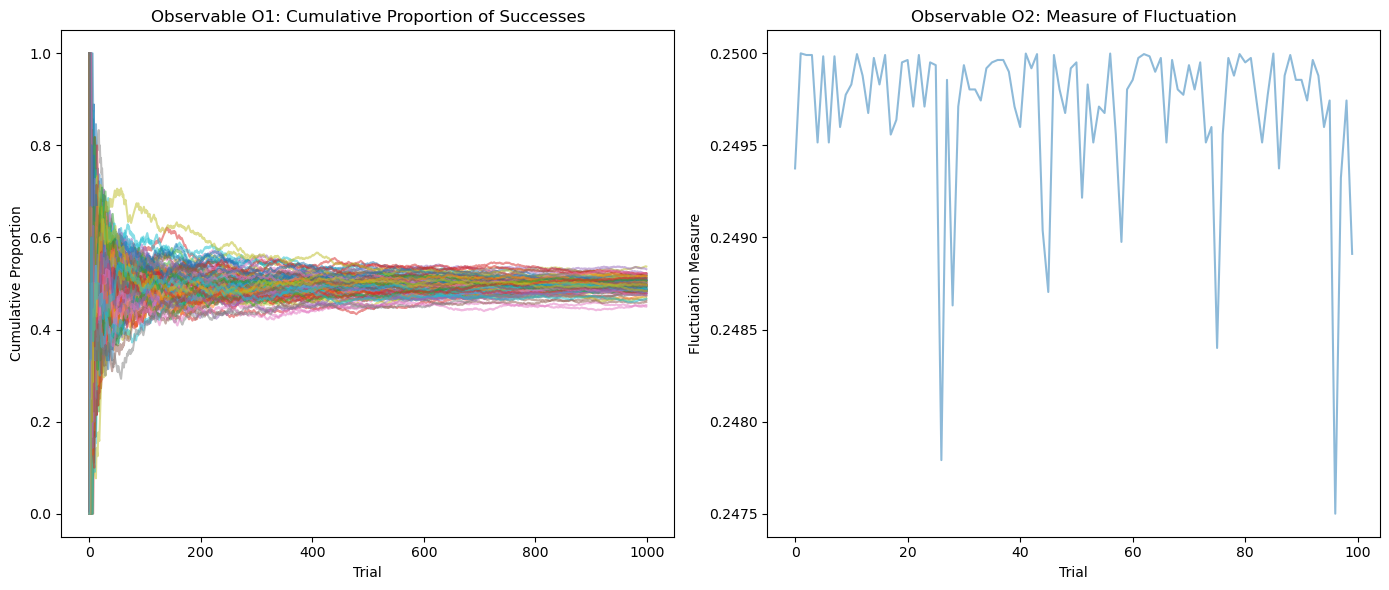

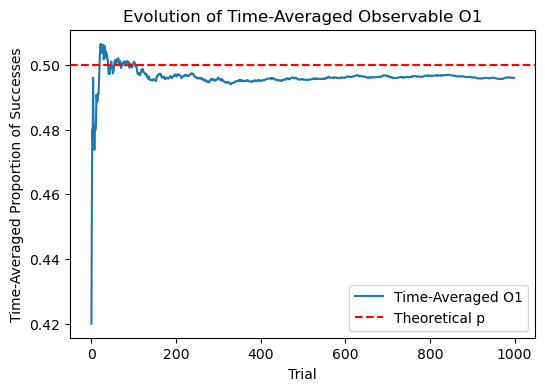

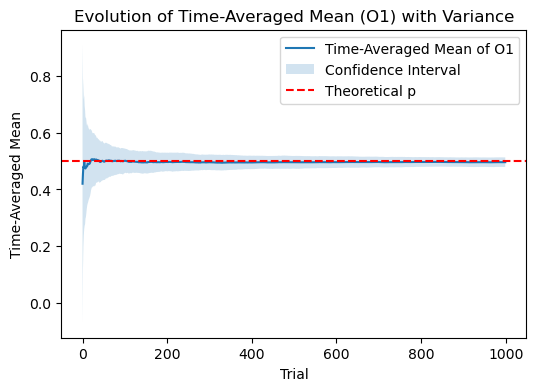

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate Bernoulli trials
def simulate_bernoulli_trials(trials, p_success, sequences=1):
    """Simulate sequences of Bernoulli trials."""
    return np.random.binomial(1, p_success, size=(sequences, trials))

# Calculate observables O1 and O2
def calculate_observables(data):
    """Calculate O1 (cumulative proportion of successes) and O2 (fluctuation measure)."""
    O1 = np.cumsum(data, axis=1) / np.arange(1, data.shape[1] + 1)
    O2 = np.var(data, axis=1)  # Simplified measure of fluctuation for demonstration
    return O1, O2

# Plotting functions for the figures
def plot_figures(data, O1, O2, p_success):
    """Plot the figures described in the request."""
    
    # Figure 1: Two Observables' Approach to Ergodicity for Bernoulli Trials
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(O1.T, alpha=0.5)
    plt.title('Observable O1: Cumulative Proportion of Successes')
    plt.xlabel('Trial')
    plt.ylabel('Cumulative Proportion')
    
    plt.subplot(1, 2, 2)
    plt.plot(O2.T, alpha=0.5)
    plt.title('Observable O2: Measure of Fluctuation')
    plt.xlabel('Trial')
    plt.ylabel('Fluctuation Measure')
    plt.tight_layout()
    plt.savefig('fig_1.jpeg')
    plt.show()

    # Figure 2: Evolution of Time-Averaged Observable O1
    plt.figure(figsize=(6, 4))
    plt.plot(O1.mean(axis=0), label='Time-Averaged O1')
    plt.axhline(y=p_success, color='r', linestyle='--', label='Theoretical p')
    plt.title('Evolution of Time-Averaged Observable O1')
    plt.xlabel('Trial')
    plt.ylabel('Time-Averaged Proportion of Successes')
    plt.legend()
    plt.savefig('fig_2.jpeg')
    plt.show()

    # Figure 3: Evolution of Time-Averaged Mean with Confidence Intervals
    plt.figure(figsize=(6, 4))
    mean_O1 = O1.mean(axis=0)
    std_O1 = O1.std(axis=0)
    plt.plot(mean_O1, label='Time-Averaged Mean of O1')
    plt.fill_between(range(len(mean_O1)), mean_O1-std_O1, mean_O1+std_O1, alpha=0.2, label='Confidence Interval')
    plt.axhline(y=p_success, color='r', linestyle='--', label='Theoretical p')
    plt.title('Evolution of Time-Averaged Mean (O1) with Variance')
    plt.xlabel('Trial')
    plt.ylabel('Time-Averaged Mean')
    plt.legend()
    plt.savefig('fig_3.jpeg')
    plt.show()

# Parameters for simulation
trials = 1000
p_success = 0.5
sequences = 100

# Simulate Bernoulli trials and calculate observables
data = simulate_bernoulli_trials(trials, p_success, sequences)
O1, O2 = calculate_observables(data)

# Plot the figures based on the calculated observables
plot_figures(data, O1, O2, p_success)
